In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import f_oneway

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
train.shape

(617, 58)

In [3]:
greek_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
greek_df.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [4]:
imputer = KNNImputer()
train_impute = train.drop(columns = ['Id','EJ', 'Class'], axis = 1)
train_df = imputer.fit_transform(train_impute)
train_df
train_imp = pd.DataFrame(data = train_df, index = train_impute.index, columns = train_impute.columns.to_list())
train_dff = pd.concat([train_imp,train.EJ, train.Class], axis = 1)
#train_dff.isnull().sum()

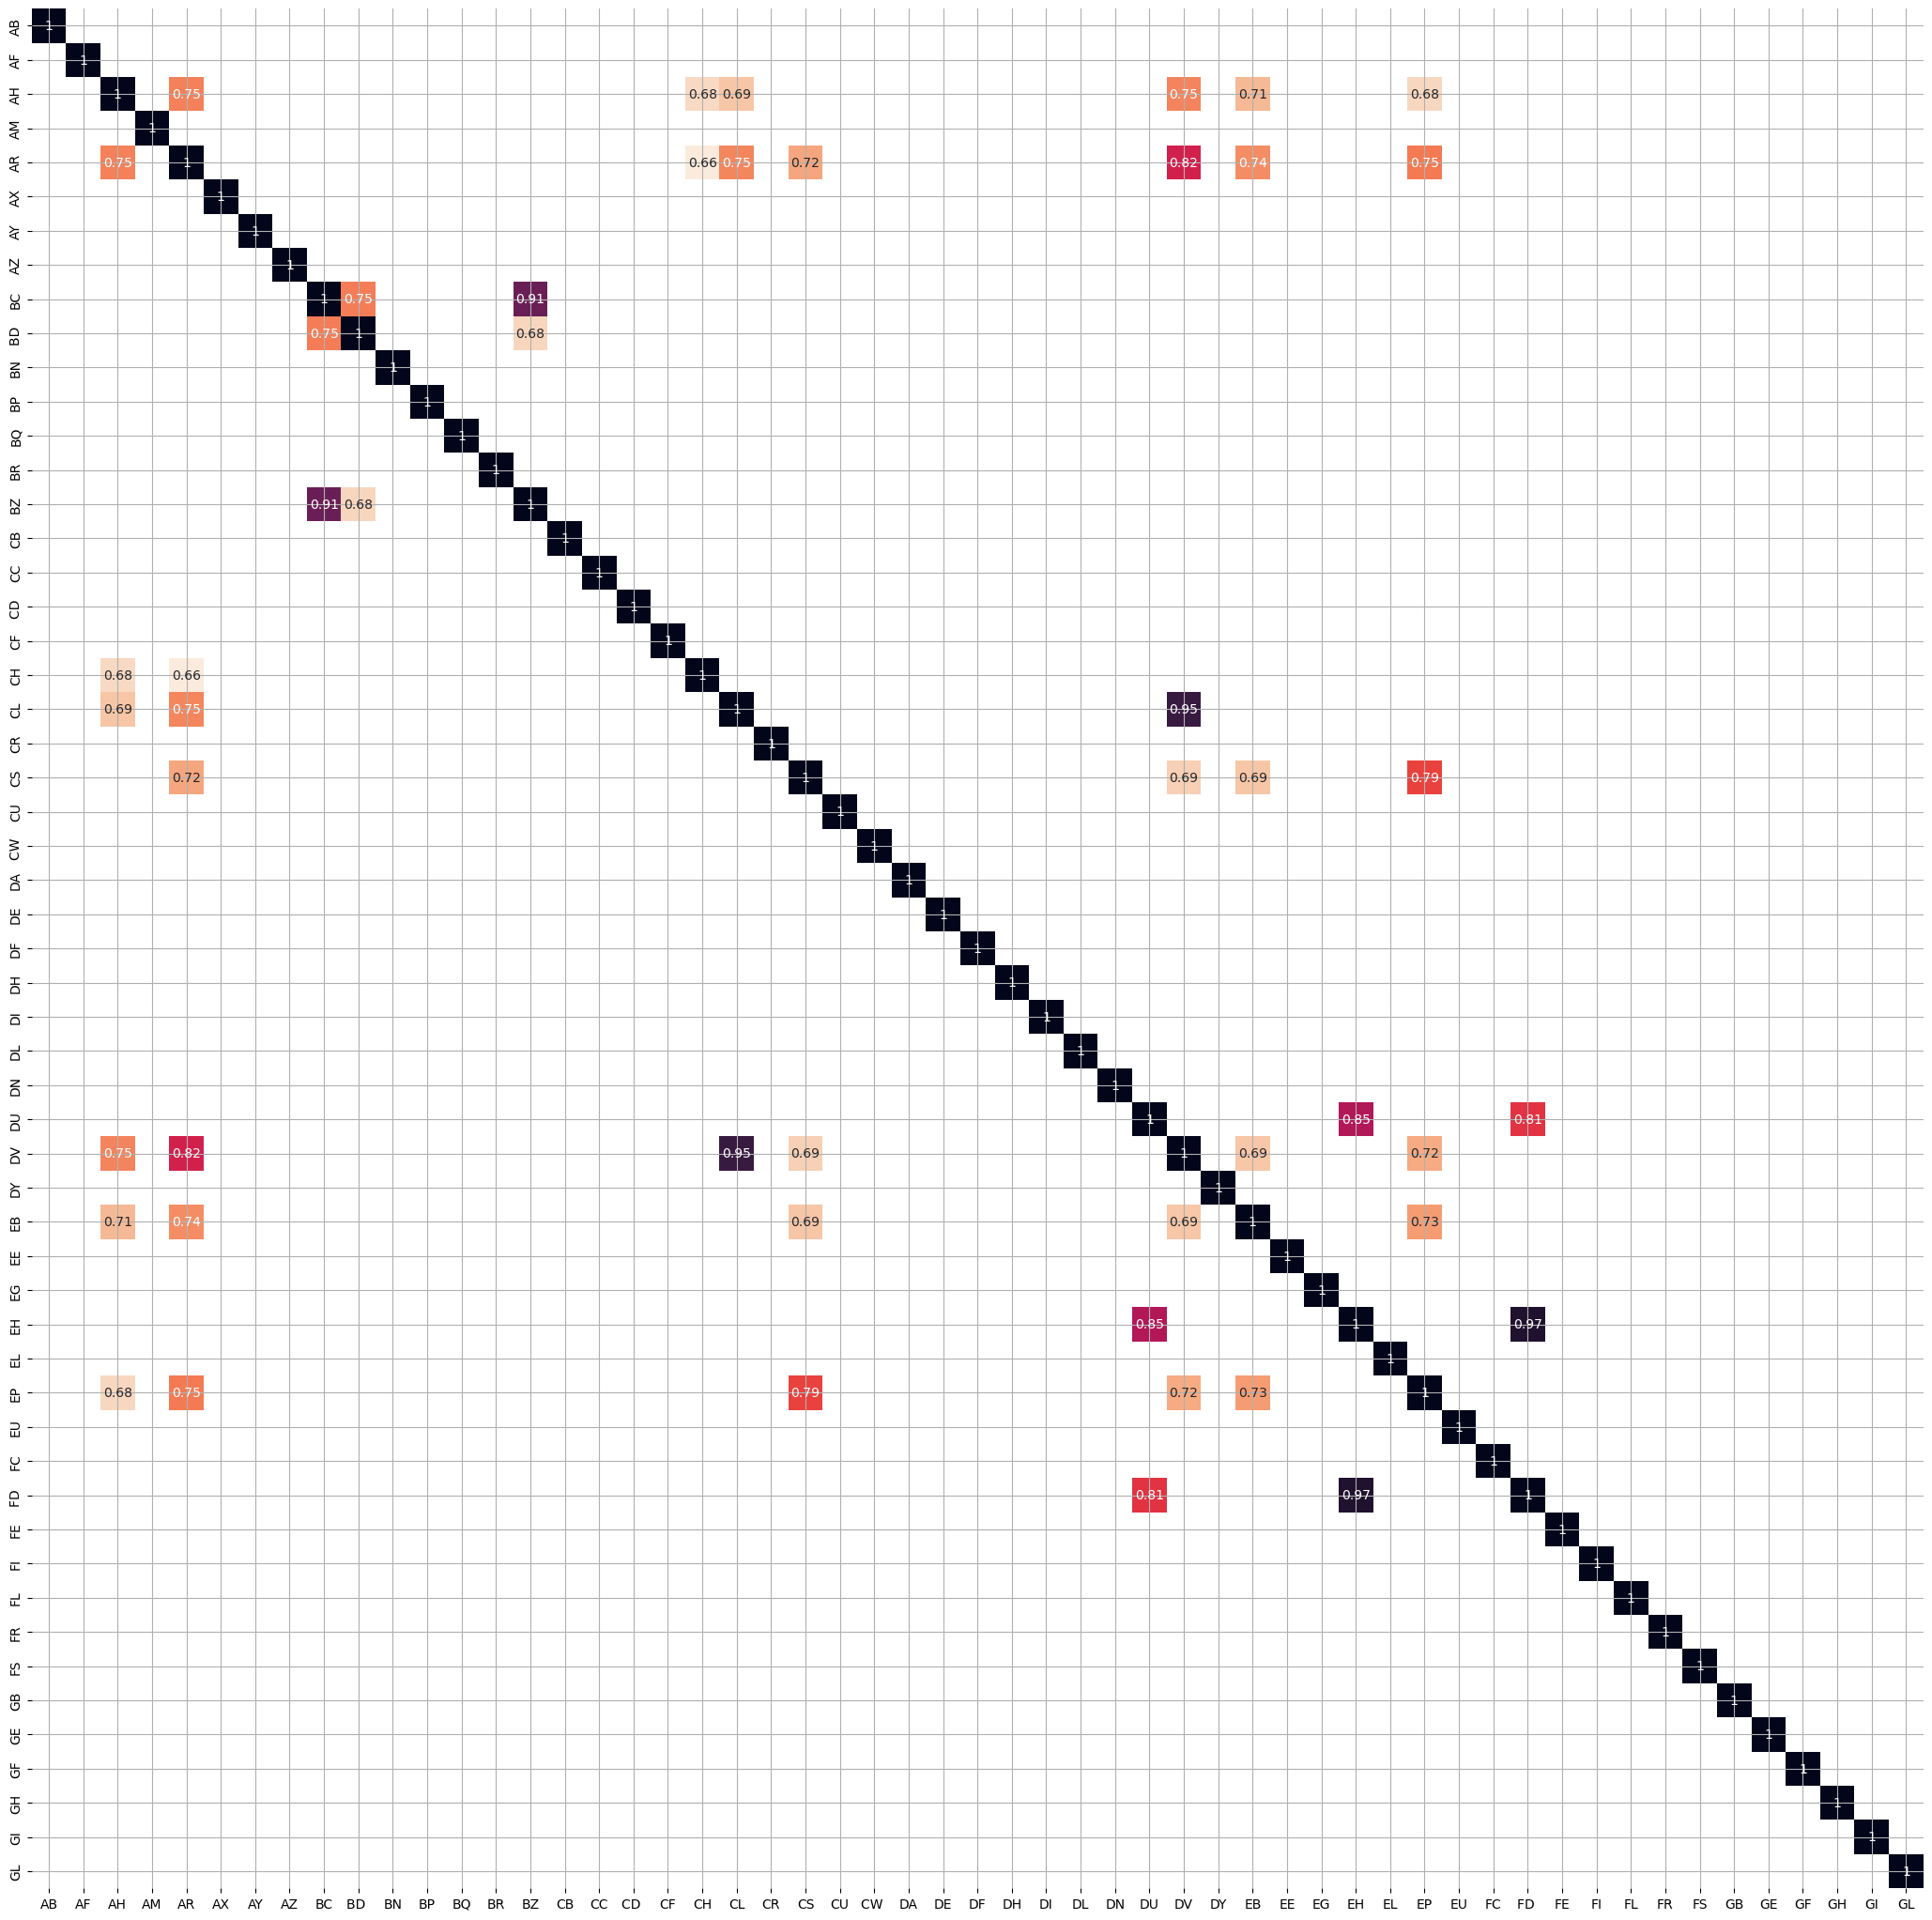

In [5]:
data_corr = train_dff.drop(columns = ['EJ', 'Class'], axis = 1)
corr_df = data_corr.corr()
corr_df = corr_df[(abs(corr_df)) >= 0.65]
plt.figure(figsize=(26,26))
sns.heatmap(corr_df, annot = True, cmap='rocket_r', cbar = False)
plt.grid()
plt.show()

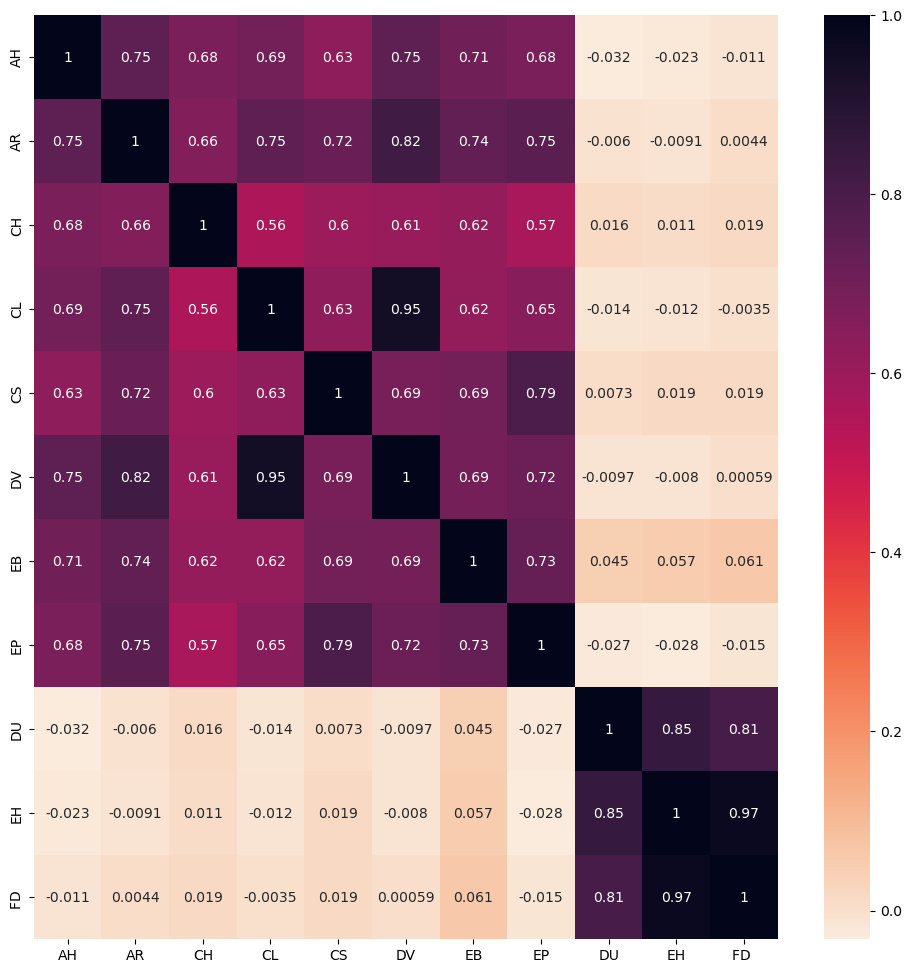

In [6]:
data_corr = train_dff.drop(columns = ['EJ', 'Class'], axis = 1)
corr_1st_cluster = data_corr[['AH', 'AR', 'CH', 'CL', 'CS', 'DV', 'EB', 'EP', 'DU', 'EH', 'FD ']]
corr_df = corr_1st_cluster.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_df, annot = True, cmap='rocket_r', cbar = True)
plt.show()

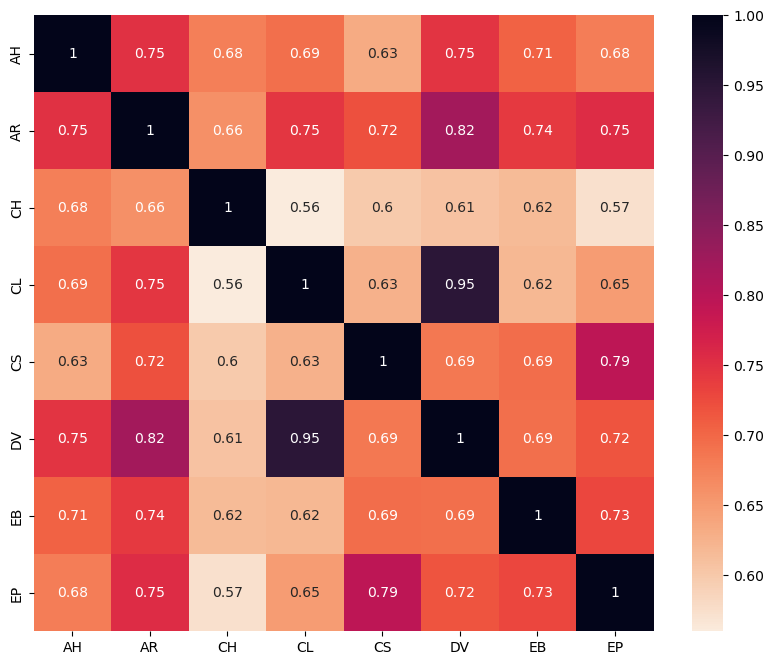

In [7]:
data_corr = train_dff.drop(columns = ['EJ', 'Class'], axis = 1)
corr_1st_cluster = data_corr[['AH', 'AR', 'CH', 'CL', 'CS', 'DV', 'EB', 'EP']]
corr_df = corr_1st_cluster.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot = True, cmap='rocket_r', cbar = True)
plt.show()

In [8]:
data_1st_cluster = pd.concat([corr_1st_cluster, train_dff.Class], axis = 1)
data_1cl_class_0 = data_1st_cluster[data_1st_cluster.Class == 0]
data_1cl_class_1 = data_1st_cluster[data_1st_cluster.Class == 1]
for col in data_1st_cluster.columns.to_list()[:-1]:
    print('Mannwhitneyu test Result for the column:', col)
    print(mannwhitneyu(data_1cl_class_0[col], data_1cl_class_1[col]), '\n')

Mannwhitneyu test Result for the column: AH
MannwhitneyuResult(statistic=28567.5, pvalue=0.4585691165063628) 

Mannwhitneyu test Result for the column: AR
MannwhitneyuResult(statistic=22941.0, pvalue=0.00017315133647863773) 

Mannwhitneyu test Result for the column: CH
MannwhitneyuResult(statistic=27342.5, pvalue=0.9322619817373052) 

Mannwhitneyu test Result for the column: CL
MannwhitneyuResult(statistic=24861.5, pvalue=0.0795676528595848) 

Mannwhitneyu test Result for the column: CS
MannwhitneyuResult(statistic=29172.0, pvalue=0.31646268472688366) 

Mannwhitneyu test Result for the column: DV
MannwhitneyuResult(statistic=25837.0, pvalue=0.01870597423216512) 

Mannwhitneyu test Result for the column: EB
MannwhitneyuResult(statistic=20267.0, pvalue=1.659144225422879e-05) 

Mannwhitneyu test Result for the column: EP
MannwhitneyuResult(statistic=29751.5, pvalue=0.14580032281606758) 



In [9]:
columns_to_drop = []
for col in data_1st_cluster.columns.to_list()[:-1]:
    U_rank, p_val = mannwhitneyu(data_1cl_class_0[col], data_1cl_class_1[col])
    if p_val >= 0.01:
        columns_to_drop.append(col)
columns_to_drop

['AH', 'CH', 'CL', 'CS', 'DV', 'EP']

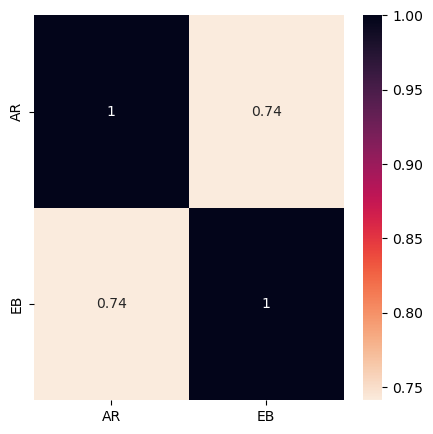

In [10]:
data_1st_cluster = data_1st_cluster.drop(columns = columns_to_drop, axis = 1)
data_1st_cluster.drop('Class', axis = 1, inplace = True)
corr_df = data_1st_cluster.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_df, annot = True, cmap='rocket_r', cbar = True)
plt.show()

In [11]:
columns_to_drop1 = columns_to_drop + ['AR']
columns_to_drop1

['AH', 'CH', 'CL', 'CS', 'DV', 'EP', 'AR']

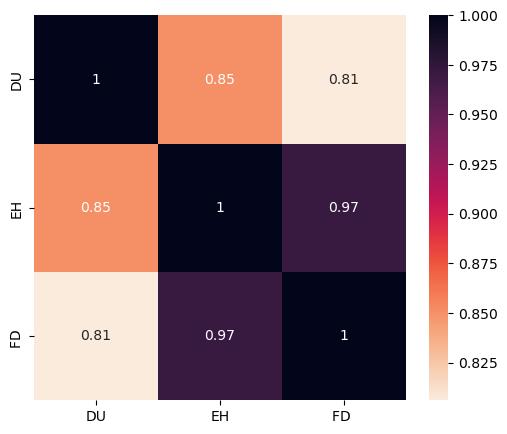

In [12]:
corr_2nd_cluster = data_corr[['DU', 'EH', 'FD ']]
corr_df = corr_2nd_cluster.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_df, annot = True, cmap='rocket_r', cbar = True)
plt.show()

In [13]:
data_2nd_cluster = pd.concat([corr_2nd_cluster, train_dff.Class], axis = 1)
data_2cl_class_0 = data_2nd_cluster[data_2nd_cluster.Class == 0]
data_2cl_class_1 = data_2nd_cluster[data_2nd_cluster.Class == 1]
for col in data_2nd_cluster.columns.to_list()[:-1]:
    print('Mannwhitneyu test Result for the column:', col)
    print(mannwhitneyu(data_2cl_class_0[col], data_2cl_class_1[col]), '\n')

Mannwhitneyu test Result for the column: DU
MannwhitneyuResult(statistic=16196.0, pvalue=6.285784201455123e-12) 

Mannwhitneyu test Result for the column: EH
MannwhitneyuResult(statistic=20349.0, pvalue=1.3990721711172588e-05) 

Mannwhitneyu test Result for the column: FD 
MannwhitneyuResult(statistic=21132.0, pvalue=0.00010297807783897472) 



In [14]:
columns_to_drop2 = ['EH', 'FD ']

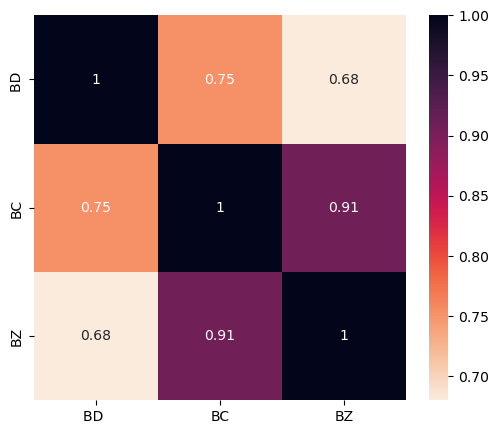

In [15]:
corr_3rd_cluster = data_corr[['BD ', 'BC', 'BZ']]
corr_df = corr_3rd_cluster.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_df, annot = True, cmap='rocket_r', cbar = True)
plt.show()

In [16]:
data_3rd_cluster = pd.concat([corr_3rd_cluster,train_dff.Class], axis = 1)
data_3rd_class_0 = data_3rd_cluster[data_3rd_cluster.Class == 0]
data_3rd_class_1 = data_3rd_cluster[data_3rd_cluster.Class == 1]
for col in data_3rd_cluster.columns.to_list()[:-1]:
    print('Mannwhitneyu test Result for the column:', col)
    print(mannwhitneyu(data_3rd_class_0[col], data_3rd_class_1[col]), '\n')

Mannwhitneyu test Result for the column: BD 
MannwhitneyuResult(statistic=28118.0, pvalue=0.7074242520656782) 

Mannwhitneyu test Result for the column: BC
MannwhitneyuResult(statistic=19079.5, pvalue=3.383287014680321e-08) 

Mannwhitneyu test Result for the column: BZ
MannwhitneyuResult(statistic=24742.5, pvalue=0.016772334002885237) 



In [17]:
columns_to_drop3 = ['BD ', 'BZ']

In [18]:
columns_to_drop_corr = columns_to_drop1 + columns_to_drop2 + columns_to_drop3
columns_to_drop_corr

['AH', 'CH', 'CL', 'CS', 'DV', 'EP', 'AR', 'EH', 'FD ', 'BD ', 'BZ']

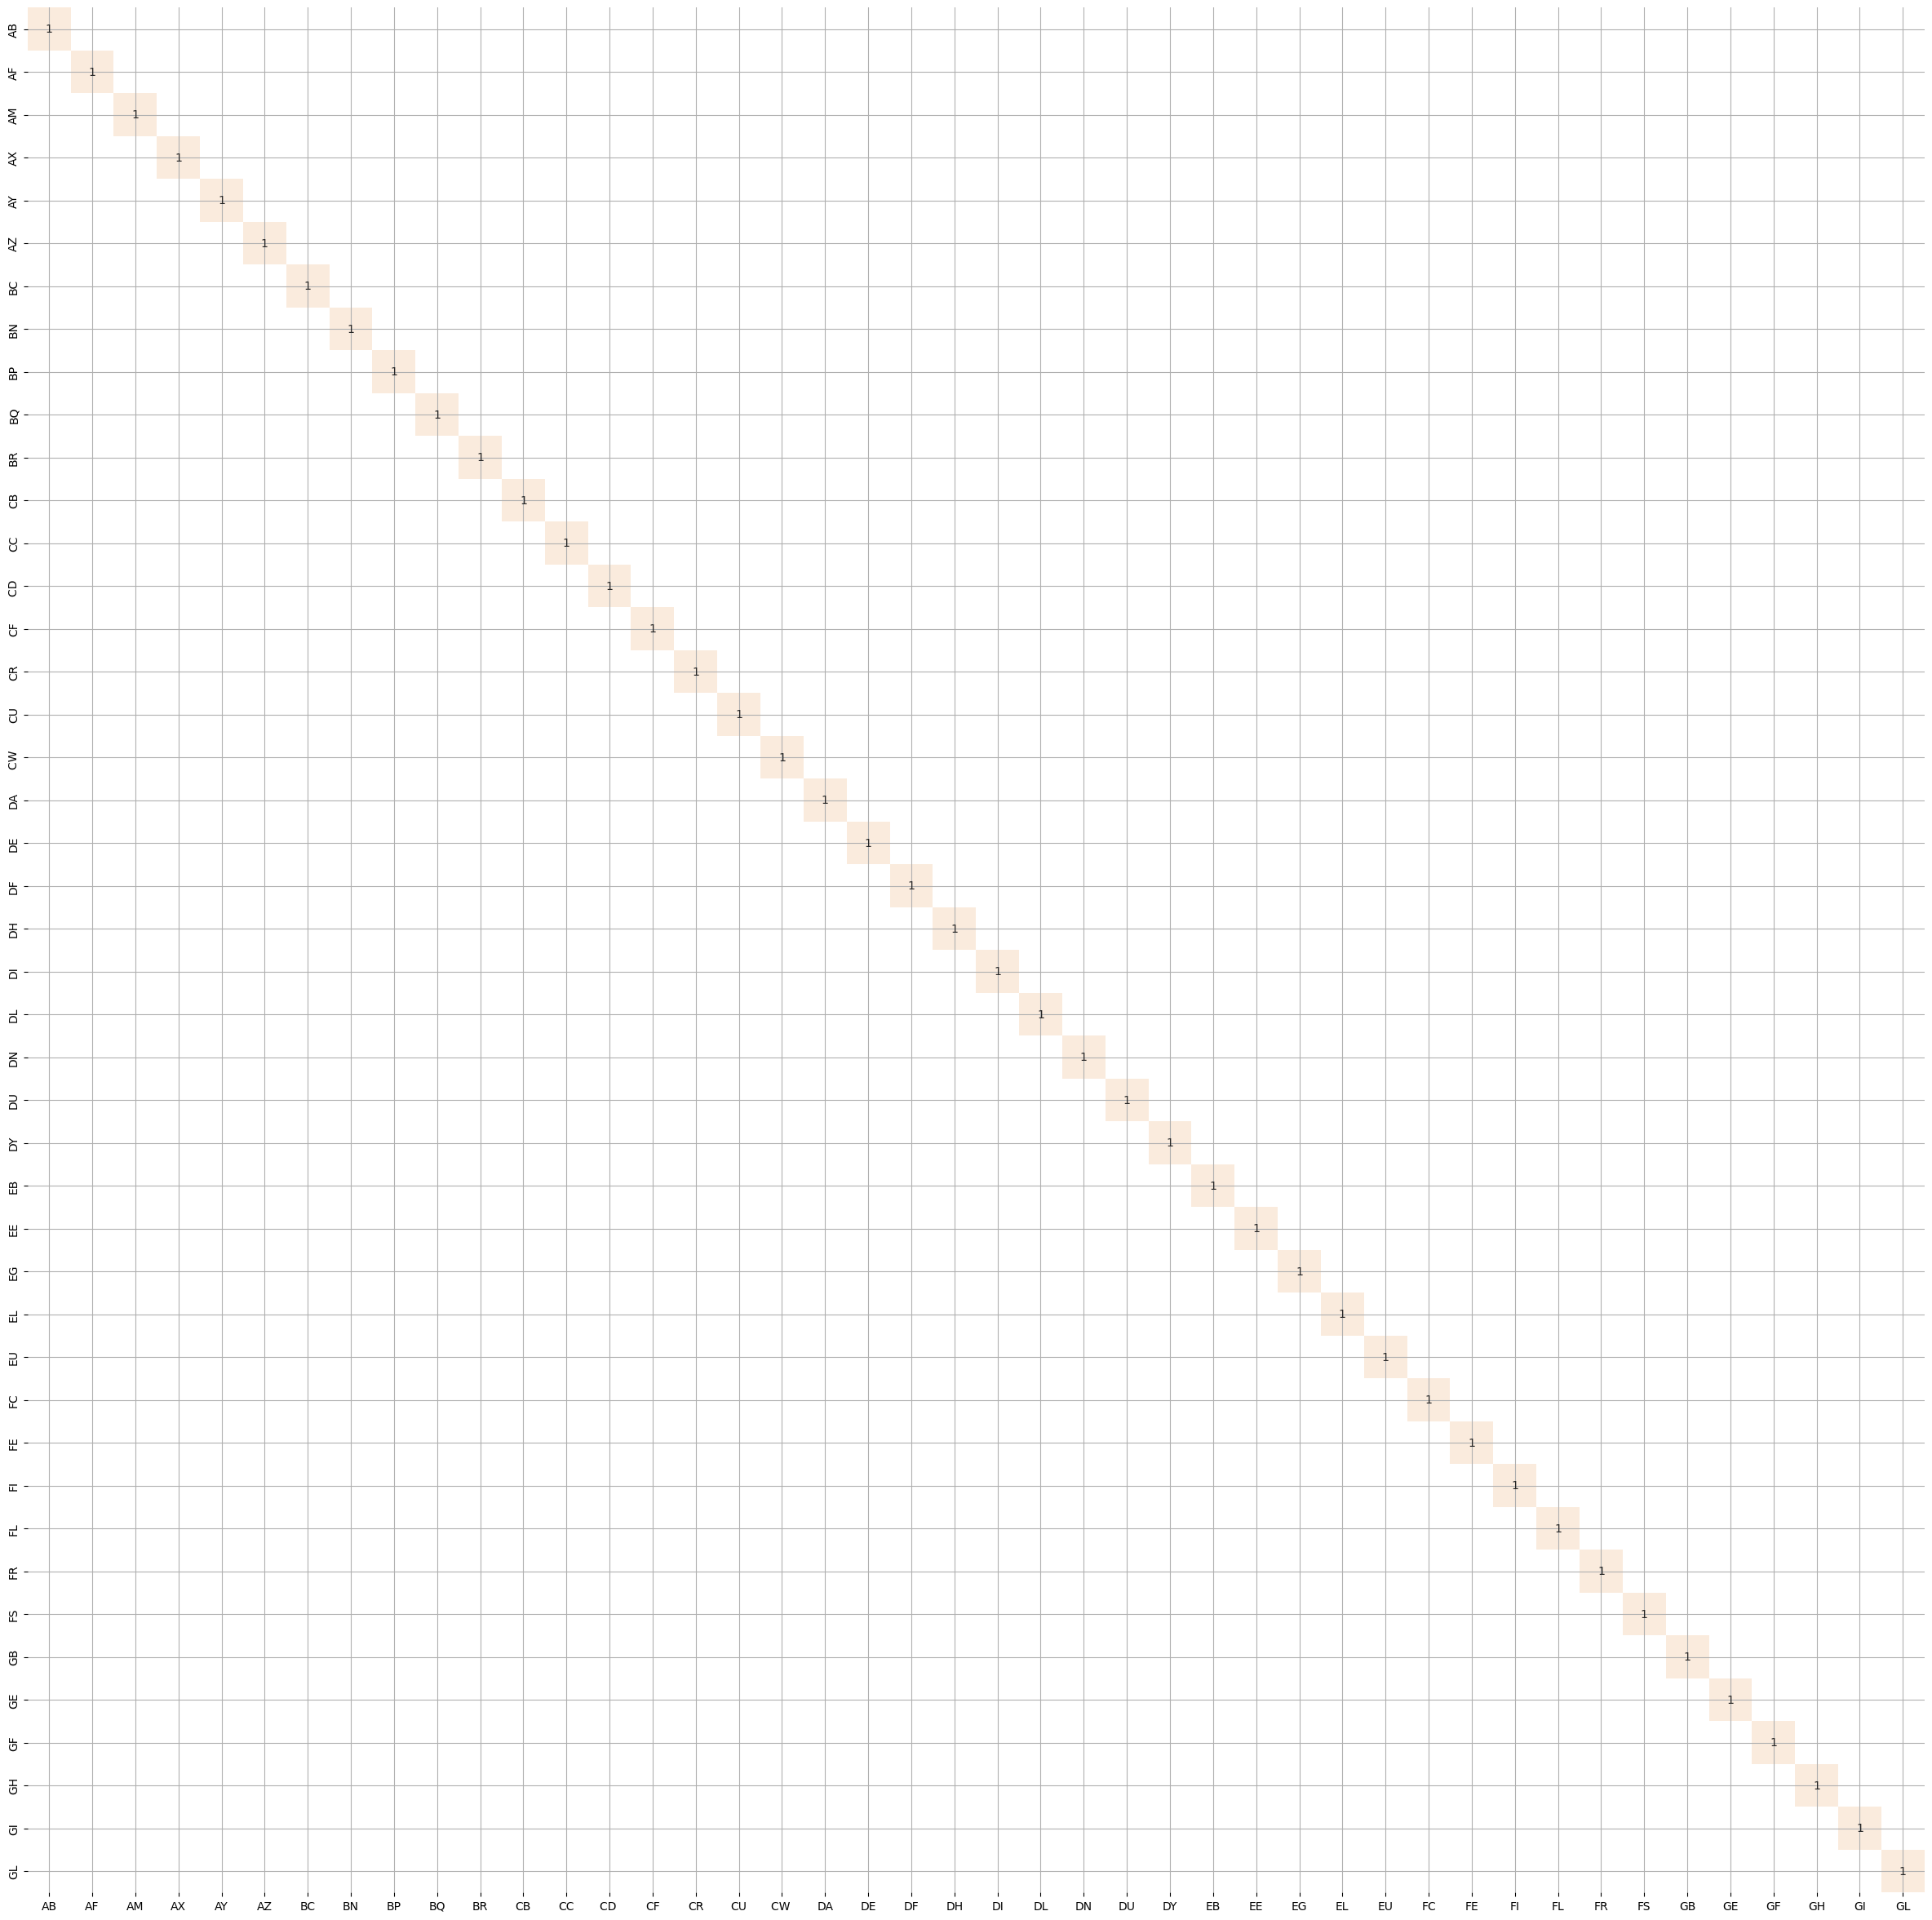

In [19]:
data_after_drop = train_dff.drop(columns = columns_to_drop_corr,axis = 1)
data_ad_corr = data_after_drop.drop(columns = ['EJ', 'Class'], axis = 1)
corr_df = data_ad_corr.corr()
corr_df = corr_df[corr_df >= 0.7]
plt.figure(figsize=(30,30))
sns.heatmap(corr_df, annot = True, cmap='rocket_r', cbar = False)
plt.grid()
plt.show()

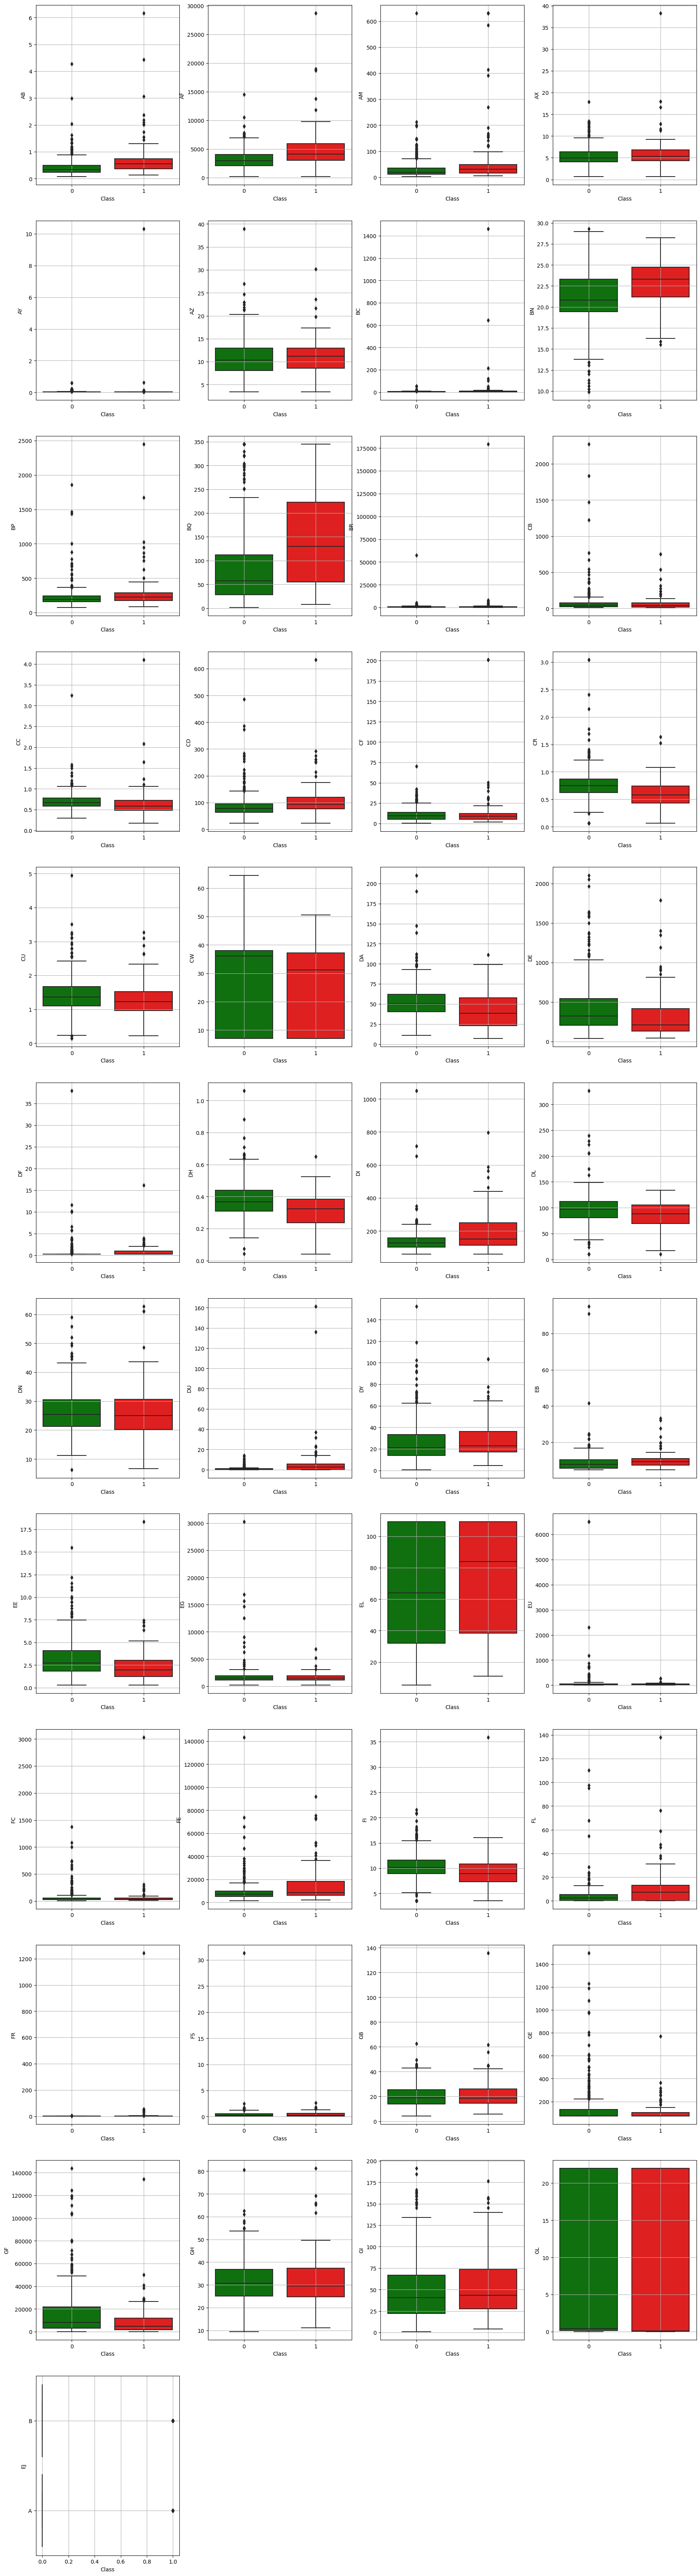

In [20]:
plt.figure(figsize = [22,100])
for i in range(data_after_drop.shape[1] - 1):
    plt.subplot(14, 4, i + 1)
    sns.boxplot(x = data_after_drop.Class, y = data_after_drop.iloc[:,i], palette = ['green', 'red'])
    plt.grid()

In [21]:
data_to_train = data_after_drop.copy()
data_to_train.isnull().sum().sum()

0

In [22]:
data_to_analyze = data_to_train.drop('EJ', axis = 1) #we need to drop object variable for these tests
data_class_0 = data_to_analyze[data_to_analyze.Class == 0]
data_class_1 = data_to_analyze[data_to_analyze.Class == 1]

features_to_drop_Utest = []
features_to_drop_Htest = []
columns = data_to_analyze.columns.to_list()
columns.remove('Class')

for column in columns:
    U_rank, p_val1 = mannwhitneyu(data_class_0[column], data_class_1[column])
    if p_val1 > 0.05:
        features_to_drop_Utest.append(column)
        print(column, 'U rank:', U_rank, 'P value:', p_val1)
    H_rank, p_val2 = kruskal(data_class_0[column], data_class_1[column])
    if p_val2 > 0.05:
        features_to_drop_Htest.append(column)

#We need to compare the tests performance
features_to_drop_Htest == features_to_drop_Utest #Perfomance checking for the both tests

AX U rank: 24896.5 P value: 0.12387252473131435
AY U rank: 29748.0 P value: 0.1042758173936365
AZ U rank: 26577.5 P value: 0.5891666444372265
BR U rank: 27889.5 P value: 0.8106634220534192
CB U rank: 28753.5 P value: 0.4512820352483915
CF U rank: 27832.0 P value: 0.8373050274357787
CW  U rank: 30251.5 P value: 0.09534622073233975
DN U rank: 29316.0 P value: 0.27689441334062126
DY U rank: 24242.5 P value: 0.05392796919927672
EG U rank: 27423.0 P value: 0.9703690109171661
EL U rank: 24654.0 P value: 0.08193576667843223
EU U rank: 25132.0 P value: 0.15867656516656026
FC U rank: 27190.0 P value: 0.8605895602308139
FS U rank: 26596.5 P value: 0.5922925334287551
GB U rank: 26190.0 P value: 0.44132864824650264
GE U rank: 30430.0 P value: 0.05208627521686564
GH U rank: 27298.0 P value: 0.911270308447415
GI U rank: 24678.5 P value: 0.09526084456731561


True

In [23]:
features_to_drop_ANOVA = []
columns = data_to_analyze.columns.to_list()
columns.remove('Class')

for column in columns:
    F, p_val = f_oneway(np.log1p(data_class_0[column]), np.log1p(data_class_1[column]))
    if p_val > 0.05:
        features_to_drop_ANOVA.append(column)
        print(column, 'F:', F, 'P value:', p_val)

#We need to compare the tests performance
features_to_drop_Utest == features_to_drop_ANOVA #Perfomance checking for the both tests

AX F: 3.288271989539755 P value: 0.07026373631825462
AY F: 2.3607184918846453 P value: 0.12493916238381524
AZ F: 0.0007053205100172908 P value: 0.9788209906464335
BR F: 0.14146444750050208 P value: 0.7069591819194481
CB F: 0.41946969660674166 P value: 0.517443469153401
CF F: 1.4361846527152875 P value: 0.2312193467137219
CW  F: 1.7219087512740827 P value: 0.1899370757777987
DN F: 0.9616555298034857 P value: 0.32715572514619407
EG F: 0.00031332948627996063 P value: 0.9858830317986427
EL F: 2.6170012213169622 P value: 0.10623681173590564
EU F: 1.8232246979392093 P value: 0.17742659822745485
FC F: 0.022279175923753454 P value: 0.8813957486296219
FS F: 0.9621431587840991 P value: 0.3270332047916801
GB F: 1.5632519875986108 P value: 0.21166521810832983
GH F: 0.05519165487111284 P value: 0.8143420059794999
GI F: 3.7100316863205536 P value: 0.054546953012873454


False

In [24]:
features_to_drop_final = list(set(features_to_drop_Utest).intersection(set(features_to_drop_ANOVA)))

In [25]:
data_obj = data_to_train[['EJ', 'Class']]
data_obj.groupby('EJ').mean()

,Class
EJ,
A,0.126126
B,0.202532


In [26]:
data_to_train.drop(columns = features_to_drop_final, axis = 1, inplace = True)
data_object = data_to_train.EJ
dummies_df = pd.get_dummies(data_object)
df_train = pd.concat([data_to_train, dummies_df], axis = 1)
df_train.drop('EJ', axis = 1, inplace = True)
df_train.isnull().sum().sum()
df_train

,AB,AF,AM,BC,BN,BP,BQ,CC,CD,CR,CU,DA,DE,DF,DH,DI,DL,DU,DY,EB,EE,FE,FI,FL,FR,GE,GF,GL,Class,A,B
0,0.209377,3109.03329,22.394407,5.555634,22.5984,175.638726,152.707705,0.563481,23.387600,0.069225,1.302012,69.08340,295.570575,0.238680,0.284232,89.245560,84.31664,5.310690,23.187704,7.294176,1.987283,9028.291921,3.583450,7.298162,1.73855,72.611063,2003.810319,0.120343,1,0,1
1,0.145282,978.76416,36.968889,1.229900,19.4205,155.868030,14.754720,0.484710,50.628208,1.117800,1.357182,70.79836,178.553100,0.238680,0.363489,110.581815,75.74548,0.005518,17.222328,4.926396,0.858603,6785.003474,10.358927,0.173229,0.49706,72.611063,27981.562750,21.978000,0,1,0
2,0.470030,2635.10654,32.360553,1.229900,26.4825,128.988531,219.320160,0.495852,85.955376,0.700350,1.009611,70.81970,321.426625,0.238680,0.210441,120.056438,65.46984,1.289739,36.861352,7.813674,8.146651,8338.906181,11.626917,7.709560,0.97556,88.609437,13676.957810,0.196941,0,0,1
3,0.252107,3819.65177,77.112203,1.229900,23.6577,237.282264,11.050410,0.717882,88.159360,0.636075,0.722727,47.27586,196.607985,0.238680,0.292431,139.824570,71.57120,2.655345,52.003884,7.386060,3.813326,10965.766040,14.852022,6.122162,0.49706,82.416803,2094.262452,0.155829,0,0,1
4,0.380297,3733.04844,14.103738,102.151980,24.0108,324.546318,149.717165,0.536467,72.644264,0.693150,0.827550,74.06532,200.178160,0.238680,0.207708,97.920120,52.83888,1.144902,9.064856,7.350720,3.490846,16198.049590,13.666727,8.153058,48.50134,146.109943,8524.370502,0.096614,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,9.513984,2.804172,21.1860,167.877117,27.287375,0.691257,55.163024,0.698250,1.070298,21.75904,355.930925,0.238680,0.445479,176.977590,90.91832,0.005518,32.508604,8.015112,1.354416,17167.209610,9.879296,0.173229,1.26092,217.148554,8095.932828,21.978000,0,1,0
613,0.435846,5462.03438,46.551007,3.777550,27.1887,285.628059,344.644105,0.772304,85.233928,0.761025,2.146113,43.90996,157.393715,0.238680,0.437280,192.598575,123.17624,0.648318,18.197092,8.976360,0.753797,18460.330020,10.910227,10.223150,1.24236,496.994214,3085.308063,0.145340,0,0,1
614,0.427300,2459.10720,55.355778,1.229900,20.4798,178.661133,103.988995,0.708616,142.680216,0.879825,1.489590,104.62032,223.209115,0.238680,0.382620,218.915925,326.23620,0.005518,47.552312,9.478188,2.225112,5088.922912,12.029366,0.173229,0.49706,128.896894,6474.652866,21.978000,0,1,0
615,0.363205,1263.53524,23.685856,1.229900,19.0674,119.162529,82.512333,0.602254,122.939496,0.583125,1.428903,51.04140,112.196630,0.532818,0.549333,113.526045,96.97092,0.510378,38.271840,10.078968,1.628524,6464.250832,8.026928,9.256996,0.78764,72.611063,1965.343176,0.184622,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, log_loss, confusion_matrix
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.utils import shuffle

In [28]:
X = df_train.drop('Class', axis = 1)
y = df_train.Class
X_shuffle, y_shuffle = shuffle(X, y, random_state = 3247)

In [29]:
estimator_XG = XGBClassifier(booster = 'gbtree', 
                             eval_metric = 'logloss',
                             tree_method = 'exact', 
                             random_state = 123, 
                             grow_policy = 'lossguide',
                             eta = 0,
                             learning_rate = 0.2, 
                             gamma = 0
                            )

params = {'n_estimators' : [110], 
          'max_depth' : [5],  
          'subsample' : [1.0],
          'scale_pos_weight' : [9], 
          'base_score' : [0.3],
          'colsample_bynode' : [0.3],
          'colsample_bytree' : [0.6],
          'colsample_bylevel' : [0.8]
         }

search_XG = GridSearchCV(estimator_XG, params, scoring = 'f1', cv = 4)
search_XG.fit(X_shuffle, y_shuffle)

print(search_XG.best_params_, '\n')
print('Best f1 score:', search_XG.best_score_, '\n')

{'base_score': 0.3, 'colsample_bylevel': 0.8, 'colsample_bynode': 0.3, 'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 110, 'scale_pos_weight': 9, 'subsample': 1.0} 

Best f1 score: 0.7693603566245075 



In [30]:
search_XG.best_params_

{'base_score': 0.3,
 'colsample_bylevel': 0.8,
 'colsample_bynode': 0.3,
 'colsample_bytree': 0.6,
 'max_depth': 5,
 'n_estimators': 110,
 'scale_pos_weight': 9,
 'subsample': 1.0}

In [31]:
y_hat = cross_val_predict(search_XG.best_estimator_, X, y, cv = 4)
print('Accuracy:', round(accuracy_score(y, y_hat), 3), '\n')
print(classification_report(y, y_hat), '\n')
print(confusion_matrix(y, y_hat))

Accuracy: 0.948 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       509
           1       0.85      0.86      0.85       108

    accuracy                           0.95       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.95      0.95      0.95       617
 

[[492  17]
 [ 15  93]]


In [32]:
acc_array = cross_val_score(search_XG.best_estimator_, X, y, scoring = 'accuracy', cv = 4)
print('Accuracies:', acc_array, '\n')
print('Mean accuracy:', round(acc_array.mean(), 3), 'Std deviation:', round(acc_array.std(), 3))

Accuracies: [0.97419355 0.94155844 0.92857143 0.94805195] 

Mean accuracy: 0.948 Std deviation: 0.017


In [33]:
probs = cross_val_predict(search_XG.best_estimator_, X, y, cv = 4, method = 'predict_proba')
prob_0_train = probs[:, 0]
prob_1_train = probs[:, 1]

In [34]:
def balanced_log_loss(y_true, y_pred, prob_0, prob_1):
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_0 = prob_0
    p_1 = prob_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    balanced_log_loss = (w_0 * log_loss_0 + w_1 * log_loss_1) / 2
    # return the average log loss
    return balanced_log_loss

balanced_log_loss(y, y_hat, prob_0_train, prob_1_train)

0.32308097714509953

In [35]:
final_estimator = search_XG.best_estimator_

In [36]:
train_proba = cross_val_predict(final_estimator, X, y, cv = 4, method = 'predict_proba')

df_check = pd.DataFrame({
    #'Id' : X.index,
    'class_0' : train_proba[:, 0],
    'class_1' : train_proba[:, 1],
    'y_train' : y,
    'y_predicted' : y_hat
})

In [37]:
df_class_0 = df_check[['class_0', 'y_train', 'y_predicted']]
df_class_1 = df_check[['class_1', 'y_train', 'y_predicted']]

In [38]:
df_class_0.groupby(['y_train', 'y_predicted']).mean()

class_0
y_train y_predicted          
0       0            0.973849
        1            0.165178
1       0            0.862613
        1            0.123172

In [39]:
df_class_0.groupby(['y_train', 'y_predicted']).max()

class_0
y_train y_predicted          
0       0            0.999971
        1            0.446308
1       0            0.998378
        1            0.464713

In [40]:
df_class_0.groupby(['y_train', 'y_predicted']).min()

class_0
y_train y_predicted          
0       0            0.541326
        1            0.011663
1       0            0.566303
        1            0.000503

In [41]:
test_data = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv',  index_col = 'Id')
test_data

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
imputer = KNNImputer()
data_test_to_impute = test_data.drop(columns = 'EJ', axis = 1)
data_test_imputed = imputer.fit_transform(data_test_to_impute)
data_test_imp = pd.DataFrame(data = data_test_imputed, index = data_test_to_impute.index, columns = data_test_to_impute.columns.to_list())
data_test_1 = pd.concat([data_test_imp, test_data.EJ], axis = 1)
data_test_1.isnull().sum().sum()

0

In [43]:
data_test_1.drop(columns = columns_to_drop_corr, axis = 1, inplace = True)
data_test_1.drop(columns = features_to_drop_final, axis = 1, inplace = True)
print(len(data_test_1.columns.to_list()))

data_test_1_object = data_test_1.EJ
dummies_df = pd.get_dummies(data_test_1_object)
df_test = pd.concat([data_test_1, dummies_df], axis = 1)
df_test.drop('EJ', axis = 1, inplace = True)
df_test

29


,AB,AF,AM,BC,BN,BP,BQ,CC,CD,CR,CU,DA,DE,DF,DH,DI,DL,DU,DY,EB,EE,FE,FI,FL,FR,GE,GF,GL,A
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [44]:
df_test['B'] = np.abs(df_test['A'] - 1)
df_test.shape

(5, 30)

In [45]:
X_t = df_test
prob_predictions = final_estimator.predict_proba(X_t)
prob_predictions

array([[0.88426834, 0.11573168],
       [0.88426834, 0.11573168],
       [0.88426834, 0.11573168],
       [0.88426834, 0.11573168],
       [0.88426834, 0.11573168]], dtype=float32)

In [46]:
prob_0 = prob_predictions[:, 0]
prob_0

array([0.88426834, 0.88426834, 0.88426834, 0.88426834, 0.88426834],
      dtype=float32)

In [47]:
prob_0[prob_0 > 0.72] = 1
#prob_0[prob_0 < 0.12] = 0
prob_1 = 1 - prob_0
prob_1

array([0., 0., 0., 0., 0.], dtype=float32)

In [48]:
X_t.index

Index(['00eed32682bb', '010ebe33f668', '02fa521e1838', '040e15f562a2',
       '046e85c7cc7f'],
      dtype='object', name='Id')

In [49]:
submission = pd.DataFrame({
    'Id' : X_t.index,
    'class_0' : prob_0,
    'class_1' : prob_1
})
submission.head()

,Id,class_0,class_1
0,00eed32682bb,1.0,0.0
1,010ebe33f668,1.0,0.0
2,02fa521e1838,1.0,0.0
3,040e15f562a2,1.0,0.0
4,046e85c7cc7f,1.0,0.0


In [50]:
submission.to_csv('submission.csv',  index = False)